# **Modules**

In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from keras.utils import np_utils
import seaborn as sns
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
# example of loading an image with the Keras API
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D, Rescaling

# **Load dataset**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [4]:
!unzip  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip 

Archive:  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip
fe829d254cd85cf845897b9c1f631a7751c6e1c4
   creating: DL-OCR-Arabic-main/
  inflating: DL-OCR-Arabic-main/.gitignore  
  inflating: DL-OCR-Arabic-main/LICENSE  
  inflating: DL-OCR-Arabic-main/README.md  
   creating: DL-OCR-Arabic-main/datatset/
  inflating: DL-OCR-Arabic-main/datatset/.DS_Store  
   creating: DL-OCR-Arabic-main/datatset/abed/
  inflating: DL-OCR-Arabic-main/datatset/abed/abed001.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed002.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed003.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed004.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed005.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed006.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed007.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed008.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed009.tif  
  inflating: DL-OCR-Arabic-main/datatset

# Exemples du dataset

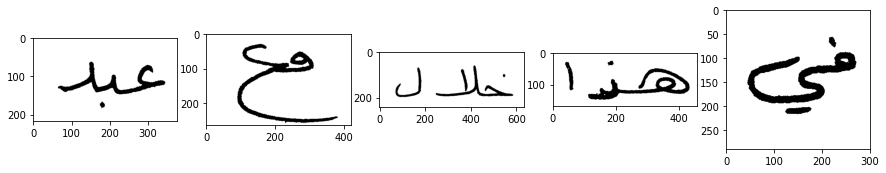

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

img =  load_img('/content/DL-OCR-Arabic-main/datatset/abed/abed001.tif')
img2 =  load_img('/content/DL-OCR-Arabic-main/datatset/ma/ma006.tif')
img3 =  load_img('/content/DL-OCR-Arabic-main/datatset/khelal/khelal001.tif')
img4 =  load_img('/content/DL-OCR-Arabic-main/datatset/hatha/hatha006.tif')
img5 = load_img('/content/DL-OCR-Arabic-main/datatset/in/in021.tif')
ax[0].imshow(img)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)

# Building dataset

In [5]:
dataset_images  = []
dataset_labels = []
directory ='/content/DL-OCR-Arabic-main/datatset/abed'
rootdir = '/content/DL-OCR-Arabic-main/datatset'
shape = (200,200)
for subdir, dirs, files in os.walk(rootdir):
 
  for file in files:
    if file.split('.')[1] == 'tif':

      img = cv2.imread(os.path.join(subdir, file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img,shape)
      dataset_images.append(img)
      dataset_labels.append(os.path.basename(subdir))


df = pd.DataFrame()
df['images'] = dataset_images
df['labels'] = dataset_labels
labels = dataset_labels
train_labels = pd.get_dummies(labels ).values
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

print(df)


                                                 images labels
0     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
1     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
3     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
...                                                 ...    ...
1903  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1904  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1905  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1906  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en
1907  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     en

[1908 rows x 2 columns]


In [6]:
unique_labels = list(OrderedDict.fromkeys(labels))
df_labels = pd.DataFrame()
df_labels['labels'] = df['labels']
labelencoder = LabelEncoder()
df_labels['labels_cat'] = labelencoder.fit_transform(df_labels['labels'] )
new_y = np.array(df_labels['labels_cat'] )

unique_labels_num = np.array(df_labels['labels_cat'].drop_duplicates())
print(df_labels)
print(new_y)
print(unique_labels_num)
print(unique_labels)

dict_lab =dict()
for i in range(0,len(unique_labels_num)):
  dict_lab[unique_labels_num[i]] = unique_labels[i]

print(dict_lab)

     labels  labels_cat
0       hya          15
1       hya          15
2       hya          15
3       hya          15
4       hya          15
...     ...         ...
1903     en          10
1904     en          10
1905     en          10
1906     en          10
1907     en          10

[1908 rows x 2 columns]
[15 15 15 ... 10 10 10]
[15  0 22 19 11  5  7 16  1 27  4  3 23  9 18 14 25 24  8  2 21 12 20 26
 13  6 17 10]
['hya', 'abed', 'mn', 'kma', 'hatha', 'alty', 'an', 'in', 'ala', 'ykon', 'althy', 'allah', 'mohd', 'ela', 'khelal', 'hwa', 'qd', 'qabel', 'aw', 'alaam', 'maa', 'hathih', 'ma', 'tm', 'hnak', 'alyom', 'kan', 'en']
{15: 'hya', 0: 'abed', 22: 'mn', 19: 'kma', 11: 'hatha', 5: 'alty', 7: 'an', 16: 'in', 1: 'ala', 27: 'ykon', 4: 'althy', 3: 'allah', 23: 'mohd', 9: 'ela', 18: 'khelal', 14: 'hwa', 25: 'qd', 24: 'qabel', 8: 'aw', 2: 'alaam', 21: 'maa', 12: 'hathih', 20: 'ma', 26: 'tm', 13: 'hnak', 6: 'alyom', 17: 'kan', 10: 'en'}


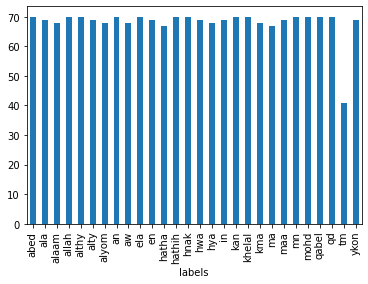

In [ ]:
df2 = df.groupby(['labels'])['labels'].count().plot(kind='bar')

hya


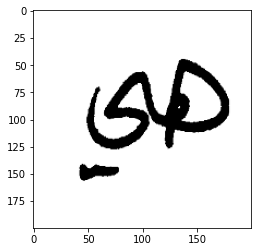

In [ ]:
plt.imshow(dataset_images[0], cmap='Greys_r')
print(dataset_labels[0])

In [ ]:
df['labels']

0        hya
1        hya
2        hya
3        hya
4        hya
        ... 
1903    mohd
1904    mohd
1905    mohd
1906    mohd
1907    mohd
Name: labels, Length: 1908, dtype: object

**Reshape data for layer input**

In [ ]:
print(dataset_images[80].shape)

(200, 200)


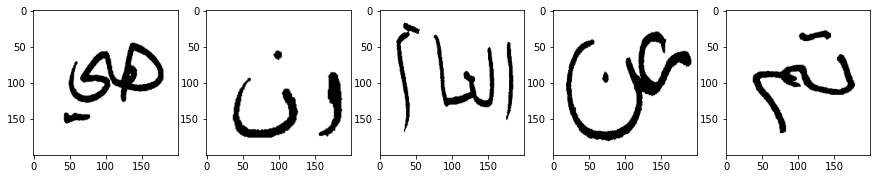

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
ax[0].imshow(dataset_images[0], cmap='Greys_r')
ax[1].imshow(dataset_images[70], cmap='Greys_r')
ax[2].imshow(dataset_images[170], cmap='Greys_r')
ax[3].imshow(dataset_images[500], cmap='Greys_r')
ax[4].imshow(dataset_images[900], cmap='Greys_r')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset_images, train_labels,test_size=0.2, random_state=42)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


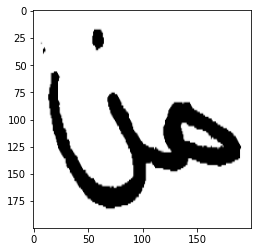

In [8]:
plt.imshow(X_train[0], cmap='Greys_r')
print(y_train[0])

label to text 

# **Building model**

# **MODEL 1 NO DATAGN**

In [ ]:
X_train.shape

(1526, 200, 200)

In [ ]:
y_train.shape

(1526, 28)

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train.shape

(1526, 28)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


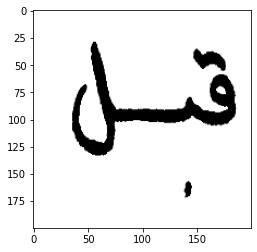

In [ ]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])


In [ ]:
y_train.shape

(1526, 28)

Reshape labels

In [ ]:
history = model.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 126s 4s/step - loss: 53.7068 - accuracy: 0.1402 - val_loss: 53.2088 - val_accuracy: 0.0550
Epoch 2/40
31/31 [==============================] - 121s 4s/step - loss: 46.6473 - accuracy: 0.3119 - val_loss: 45.7922 - val_accuracy: 0.1178
Epoch 3/40
31/31 [==============================] - 124s 4s/step - loss: 38.9506 - accuracy: 0.4862 - val_loss: 36.1994 - val_accuracy: 0.2461
Epoch 4/40
31/31 [==============================] - 120s 4s/step - loss: 31.6371 - accuracy: 0.6101 - val_loss: 28.6987 - val_accuracy: 0.5942
Epoch 5/40
31/31 [==============================] - 124s 4s/step - loss: 25.3142 - accuracy: 0.7071 - val_loss: 23.2605 - val_accuracy: 0.5288
Epoch 6/40
31/31 [==============================] - 123s 4s/step - loss: 20.0392 - accuracy: 0.7910 - val_loss: 18.3068 - val_accuracy: 0.7147
Epoch 7/40
31/31 [==============================] - 120s 4s/step - loss: 15.8885 - accuracy: 0.8309 - val_loss: 15.8808 - val_accuracy: 0.3377

In [ ]:
# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 batch_normalization_15 (Bat  (None, 200, 200, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 batch_normalization_16 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                      

In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 7s 570ms/step


In [ ]:
y_true = y_test

In [ ]:
X_test.shape

(382, 200, 200)

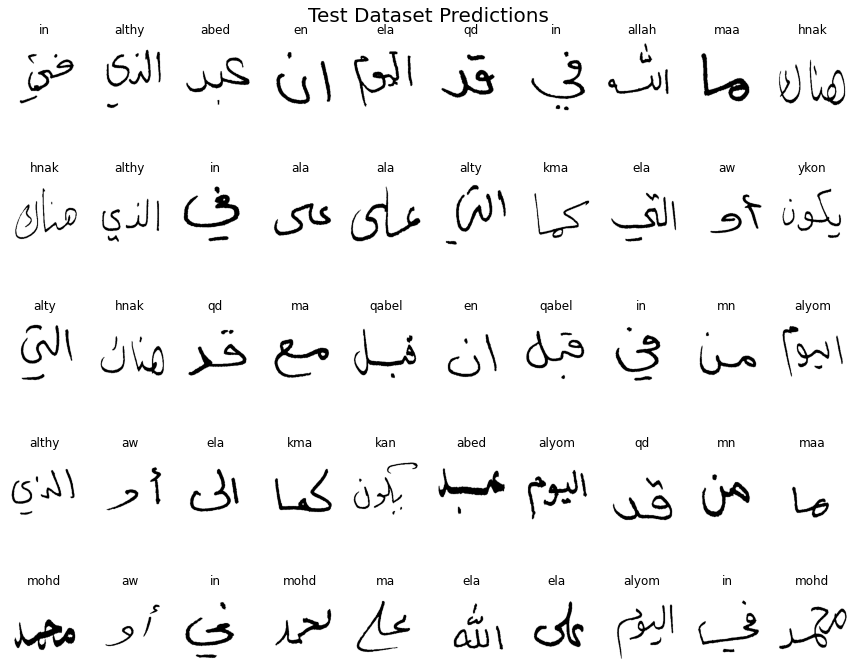

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx], cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

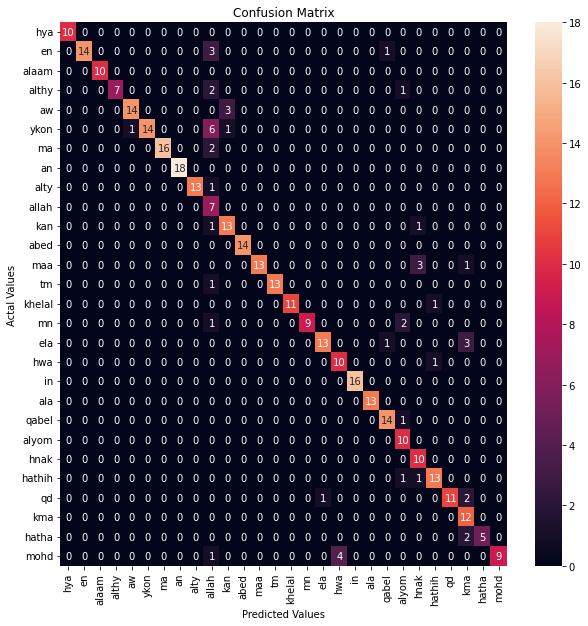

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
ll = log_loss(y_test, y_pred)

0.44058273703516465

In [ ]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

0.8641912982885259

In [ ]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

0.9981402661172993

In [ ]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen_kappa_score", "roc_auc_score"])

,log loss,cohen_kappa_score,roc_auc_score
0,0.440583,0.864191,0.99814


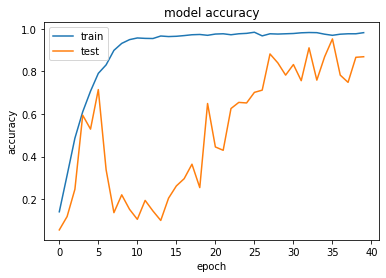

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

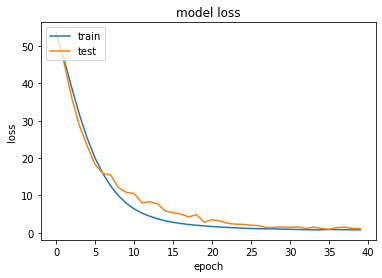

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = qabel  pred = qabel
real = en  pred = en
real = mohd  pred = mohd
real = khelal  pred = khelal
real = ma  pred = ma
real = hatha  pred = hatha
real = en  pred = en
real = an  pred = an
real = alty  pred = ela
real = mn  pred = mn
real = qabel  pred = qabel
real = khelal  pred = khelal
real = ela  pred = ela
real = en  pred = mn
real = ykon  pred = kan
real = mohd  pred = mohd
real = hwa  pred = mohd
real = kan  pred = mohd
real = ykon  pred = ykon
real = ala  pred = ela
real = aw  pred = aw
real = maa  pred = maa
real = hwa  pred = hwa
real = in  pred = in
real = althy  pred = althy
real = abed  pred = abed
real = en  pred = en
real = alyom  pred = ela
real = qd  pred = qd
real = in  pred = in
real = allah  pred = allah
real = maa  pred = maa
real = hnak  pred = hnak
real = hnak  pred = hnak
real = althy  pred = althy
real = in  pred = in
real = ala  pred = ala
real = ala  pred = ala
real = alty  pred = alty
real = kma  pred = kma
real = alty  pred = ela
real = aw  pred = aw
rea

In [ ]:
model.save('./models/vgg_model.h5') 

In [ ]:
!mv /content/models/vgg_model.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# **MODEL 2 NO DATAGN**

In [ ]:
X_train.shape

(1526, 200, 200)

In [ ]:
y_train.shape

(1526, 28)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters= 24, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="tanh"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=40, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=72, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(Conv2D(filters=72, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(4096, activation='tanh', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='tanh', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(28, activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Nadam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train.shape

(1526, 28)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


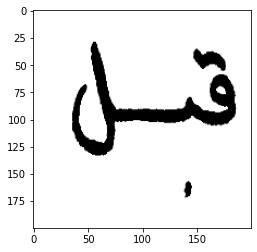

In [ ]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])

In [ ]:
y_train.shape

(1526, 28)

Reshape labels

In [ ]:
history = model2.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 189s 6s/step - loss: 50.3160 - accuracy: 0.0931 - val_loss: 40.0512 - val_accuracy: 0.1728
Epoch 2/40
31/31 [==============================] - 181s 6s/step - loss: 33.2052 - accuracy: 0.2195 - val_loss: 27.4649 - val_accuracy: 0.1283
Epoch 3/40
31/31 [==============================] - 177s 6s/step - loss: 22.2567 - accuracy: 0.3447 - val_loss: 19.3686 - val_accuracy: 0.1649
Epoch 4/40
31/31 [==============================] - 178s 6s/step - loss: 15.6098 - accuracy: 0.4810 - val_loss: 14.5270 - val_accuracy: 0.2592
Epoch 5/40
31/31 [==============================] - 178s 6s/step - loss: 11.4283 - accuracy: 0.6107 - val_loss: 11.6616 - val_accuracy: 0.2382
Epoch 6/40
31/31 [==============================] - 178s 6s/step - loss: 8.6956 - accuracy: 0.7254 - val_loss: 9.3187 - val_accuracy: 0.3298
Epoch 7/40
31/31 [==============================] - 178s 6s/step - loss: 6.7739 - accuracy: 0.8178 - val_loss: 7.8361 - val_accuracy: 0.3770
Epo

In [ ]:
# Model Summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 24)      240       
                                                                 
 batch_normalization_5 (Batc  (None, 200, 200, 24)     96        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 24)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 40)      8680      
                                                                 
 batch_normalization_6 (Batc  (None, 100, 100, 40)     160       
 hNormalization)                                                 
                                                      

In [ ]:
y_pred = model2.predict(X_test)

12/12 [==============================] - 17s 1s/step


In [ ]:
y_true = y_test

In [ ]:
X_test.shape

(382, 200, 200)

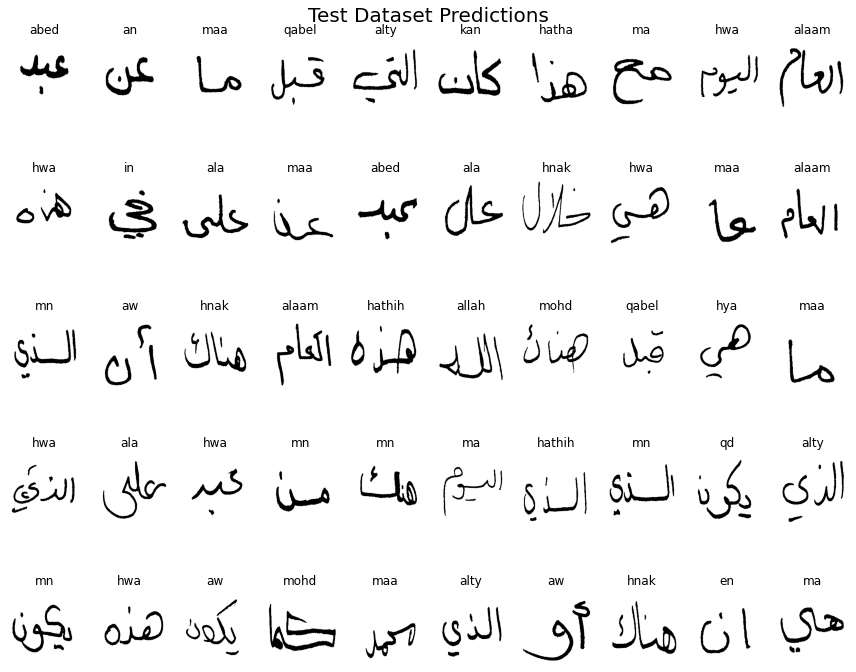

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx], cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

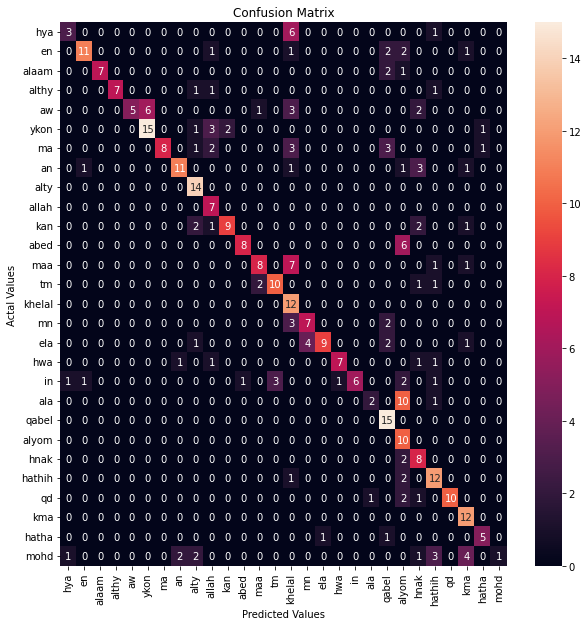

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
ll = log_loss(y_test, y_pred)

1.3056113467784065

In [ ]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

0.6118879131497428

In [ ]:
# Generate class membership probabilities
#good roc auc >8
ras  = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

0.9846042182917624

In [ ]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen kappa score", "roc auc score"])

,log loss,cohen_kappa_score,roc_auc_score
0,1.305611,0.611888,0.984604


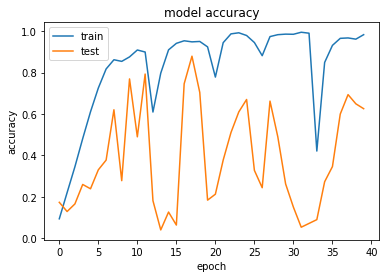

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

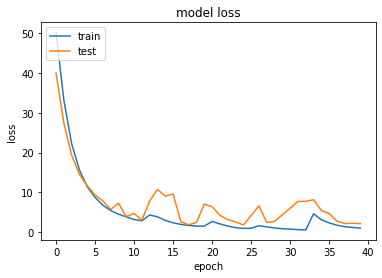

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = qabel  pred = qabel
real = en  pred = en
real = mohd  pred = mohd
real = khelal  pred = khelal
real = ma  pred = ma
real = hatha  pred = maa
real = en  pred = mn
real = an  pred = an
real = alty  pred = ela
real = mn  pred = mn
real = qabel  pred = maa
real = khelal  pred = khelal
real = ela  pred = ela
real = en  pred = mn
real = ykon  pred = qd
real = mohd  pred = mohd
real = hwa  pred = hwa
real = kan  pred = mohd
real = ykon  pred = mohd
real = ala  pred = qd
real = aw  pred = aw
real = maa  pred = maa
real = hwa  pred = hwa
real = in  pred = in
real = althy  pred = alty
real = abed  pred = hwa
real = en  pred = en
real = alyom  pred = ela
real = qd  pred = qd
real = in  pred = in
real = allah  pred = allah
real = maa  pred = maa
real = hnak  pred = hathih
real = hnak  pred = hnak
real = althy  pred = hwa
real = in  pred = hya
real = ala  pred = hwa
real = ala  pred = ala
real = alty  pred = alty
real = kma  pred = maa
real = alty  pred = alty
real = aw  pred = aw
real = yko

In [ ]:
model.save('./models/vgg_model_2.h5') 

In [ ]:
!mv /content/models/vgg_model_2.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# Data Generator

In [9]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape)
print(X_test.shape)

(1526, 200, 200, 1)
(382, 200, 200, 1)


In [10]:
 #loading training data

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)


validation_datagen =  ImageDataGenerator(rescale=1./255)


batch_size = 48

train_generator = train_datagen.flow(X_train,y_train, batch_size=batch_size, shuffle=True)

validation_generator = validation_datagen.flow(X_test,y_test, batch_size=batch_size, shuffle=False)

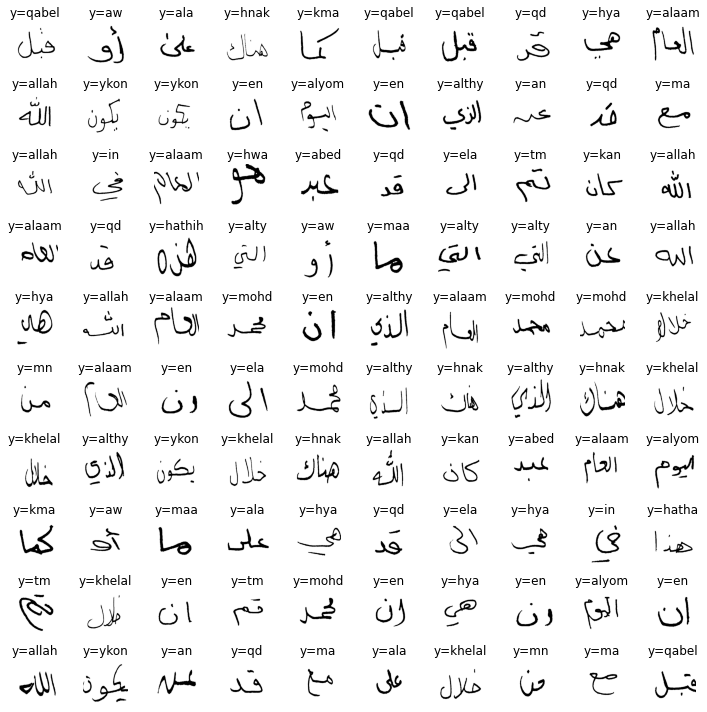

In [11]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    for x,y in train_generator:
        im = cv2.resize(x[0], (200, 200)) 
        plt.imshow(im, cmap='Greys_r')
        idx=np.where(y[0] == 1)
        plt.title('y={}'.format(dict_lab[idx[0][0]]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

# Model 1 with data gen

In [ ]:
model_da = Sequential()
model_da.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="relu"))
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da.add(BatchNormalization())
model_da.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da.add(Flatten())
model_da.add(Dense(4096, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model_da.add(Dropout(0.5))
model_da.add(Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model_da.add(Dropout(0.5))
model_da.add(Dense(28, activation='softmax'))
model_da.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model_da.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=60,
                    validation_data=(validation_generator))

Epoch 1/60
31/31 [==============================] - 130s 4s/step - loss: 56.6124 - accuracy: 0.0531 - val_loss: 54.7929 - val_accuracy: 0.0314
Epoch 2/60
31/31 [==============================] - 129s 4s/step - loss: 55.6119 - accuracy: 0.0670 - val_loss: 54.7473 - val_accuracy: 0.0314
Epoch 3/60
31/31 [==============================] - 124s 4s/step - loss: 55.0362 - accuracy: 0.0907 - val_loss: 54.7057 - val_accuracy: 0.0314
Epoch 4/60
31/31 [==============================] - 129s 4s/step - loss: 54.6588 - accuracy: 0.1096 - val_loss: 54.6688 - val_accuracy: 0.0262
Epoch 5/60
31/31 [==============================] - 128s 4s/step - loss: 54.4423 - accuracy: 0.1344 - val_loss: 54.6376 - val_accuracy: 0.0288
Epoch 6/60
31/31 [==============================] - 129s 4s/step - loss: 54.2684 - accuracy: 0.1626 - val_loss: 54.6060 - val_accuracy: 0.0262
Epoch 7/60
31/31 [==============================] - 127s 4s/step - loss: 54.0563 - accuracy: 0.1800 - val_loss: 54.5693 - val_accuracy: 0.0262

In [ ]:
redim_test = []
for x in X_test:
  redim_test.append( x/ 255)

redim_test = np.array(redim_test)

In [ ]:
y_pred_gen = model_da.predict(redim_test)

12/12 [==============================] - 8s 616ms/step


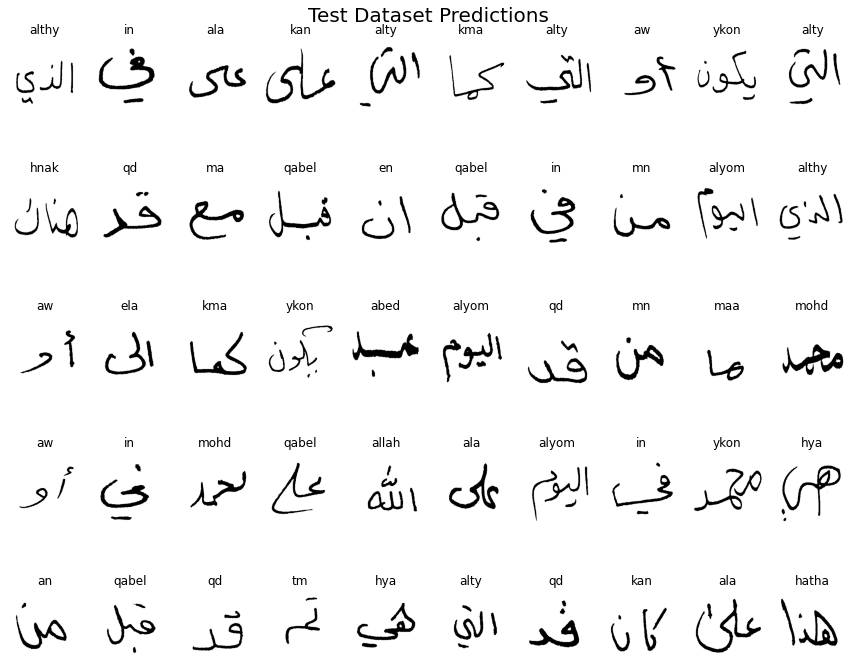

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,360)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred_gen[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        im = cv2.resize(X_test[idx], (200, 200))
        ax[i, j].imshow(im, cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

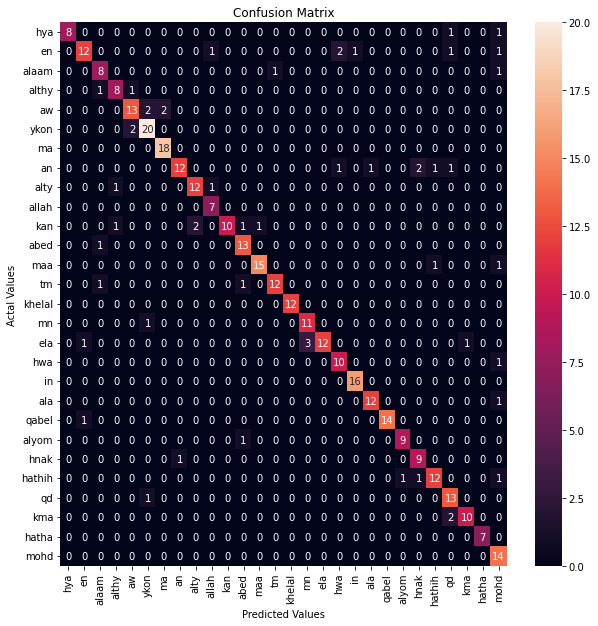

In [ ]:
y_predm=np.argmax(y_pred_gen, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)
cm
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

0.8558326331230328

In [ ]:
ll = log_loss(y_test, y_pred_gen)

0.4858199392106882

In [ ]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred_gen, average="weighted", multi_class="ovr")

0.9955819690462826

In [ ]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen kappa score", "roc auc score"])

,log loss,cohen kappa score,roc auc score
0,0.855833,0.48582,0.995582


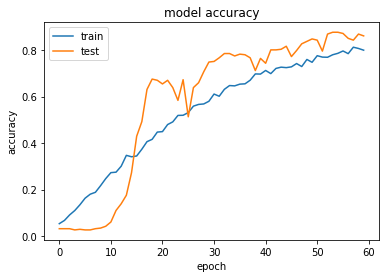

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


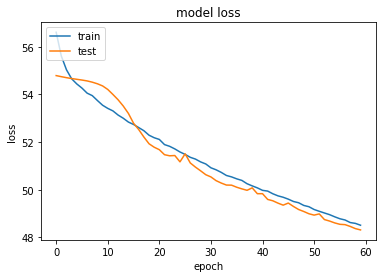

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('./models/vgg_model_augdata.h5') 

In [ ]:
!mv /content/models/vgg_model_augdata.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# Model 2 with data gen

In [12]:
model_da_2 = Sequential()
model_da_2.add(Conv2D(filters= 24, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="tanh"))
model_da_2.add(BatchNormalization())
model_da_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da_2.add(Conv2D(filters=40, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(BatchNormalization())
model_da_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da_2.add(Conv2D(filters=72, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(Conv2D(filters=72, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(BatchNormalization())
model_da_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da_2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(BatchNormalization())
model_da_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da_2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(Conv2D(filters=104, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model_da_2.add(BatchNormalization())
model_da_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_da_2.add(Flatten())
model_da_2.add(Dense(4096, activation='tanh', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model_da_2.add(Dropout(0.5))
model_da_2.add(Dense(512, activation='tanh', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model_da_2.add(Dropout(0.5))
model_da_2.add(Dense(28, activation='softmax'))
model_da_2.compile(optimizer=tf.keras.optimizers.Nadam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model_da_2.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=100,
                    validation_data=(validation_generator))

Epoch 1/100
31/31 [==============================] - 220s 7s/step - loss: 50.3987 - accuracy: 0.0487 - val_loss: 40.2530 - val_accuracy: 0.0785
Epoch 2/100
31/31 [==============================] - 206s 7s/step - loss: 32.6274 - accuracy: 0.1428 - val_loss: 28.5535 - val_accuracy: 0.0497
Epoch 3/100
31/31 [==============================] - 207s 7s/step - loss: 21.8773 - accuracy: 0.2158 - val_loss: 18.1430 - val_accuracy: 0.2304
Epoch 4/100
31/31 [==============================] - 208s 7s/step - loss: 15.7027 - accuracy: 0.2984 - val_loss: 13.3546 - val_accuracy: 0.3220
Epoch 5/100
31/31 [==============================] - 210s 7s/step - loss: 11.7628 - accuracy: 0.4202 - val_loss: 10.3173 - val_accuracy: 0.4607
Epoch 6/100
31/31 [==============================] - 209s 7s/step - loss: 9.2925 - accuracy: 0.5271 - val_loss: 14.3962 - val_accuracy: 0.0812
Epoch 7/100
31/31 [==============================] - 209s 7s/step - loss: 7.5592 - accuracy: 0.6177 - val_loss: 13.3085 - val_accuracy: 0

In [16]:
redim_test = []
for x in X_test:
  redim_test.append( x/ 255)

redim_test = np.array(redim_test)

In [18]:
y_pred_gen = model_da_2.predict(redim_test)

NameError: ignored

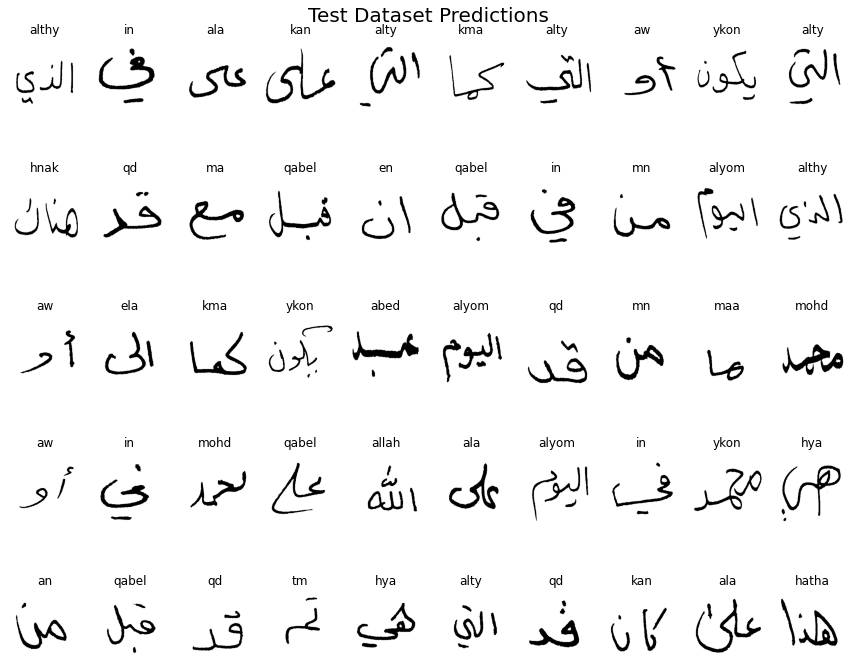

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,360)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred_gen[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        im = cv2.resize(X_test[idx], (200, 200))
        ax[i, j].imshow(im, cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

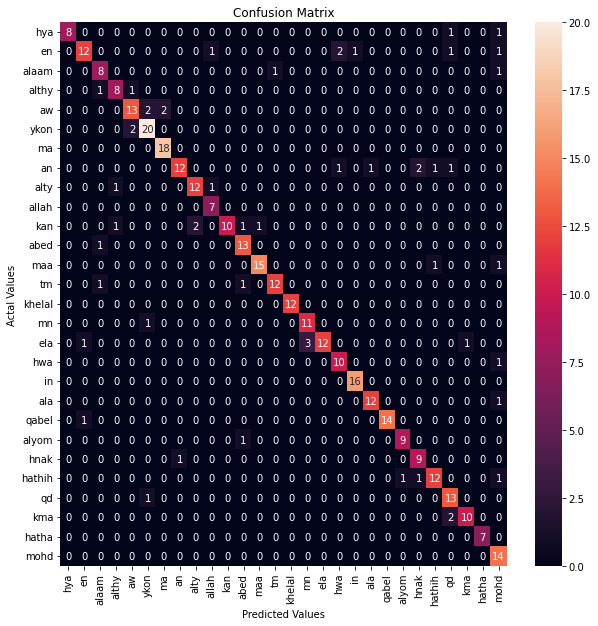

In [ ]:
y_predm=np.argmax(y_pred_gen, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)
cm
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

0.8558326331230328

In [ ]:
ll = log_loss(y_test, y_pred_gen)

0.4858199392106882

In [ ]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred_gen, average="weighted", multi_class="ovr")

0.9955819690462826

In [ ]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen kappa score", "roc auc score"])

,log loss,cohen kappa score,roc auc score
0,0.855833,0.48582,0.995582


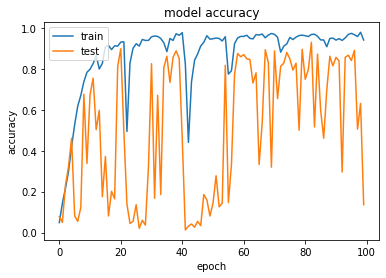

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


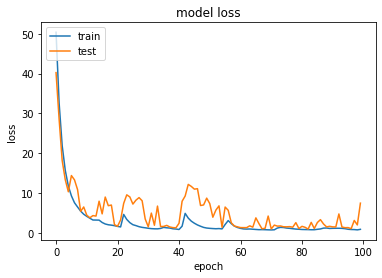

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('./models/vgg_model_augdata.h5') 

In [ ]:
!mv /content/models/vgg_model_augdata.h5 /content/drive/MyDrive/OCR-DATASET-PROF